# Building a Multiple Linear Regression Model

For this project, I'll build a multiple linear regression model that helps to estimate the number of rides for a bike company and then evaluate the model.

Steps:
1. Exploratory Data Analysis
2. Sampling
3. Data Cleaning
4. Handling Outliers
5. Visualize Data
6. Feature Engineering
7. Model Building and Evaluation
8. Checking Model Assumption
9. Interpreting Model Results

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import sklearn.metrics as metrics

#### Import Dataset

In [2]:
# Import all the monthly csv dataset
nov_20 = pd.read_csv(r"/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202011-divvy-tripdata.csv")
dec_20 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202012-divvy-tripdata.csv')
jan_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202101-divvy-tripdata.csv')
feb_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202102-divvy-tripdata.csv')
march_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202103-divvy-tripdata.csv')
april_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202104-divvy-tripdata.csv')
may_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202105-divvy-tripdata.csv')
jun_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202106-divvy-tripdata.csv')
july_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202107-divvy-tripdata.csv')
aug_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202108-divvy-tripdata.csv')
sept_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202109-divvy-tripdata.csv')
oct_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202110-divvy-tripdata.csv')
nov_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202111-divvy-tripdata.csv')

# Join all months into a single dataframe
months = [nov_20, dec_20, jan_21, feb_21, march_21, april_21, may_21, jun_21, july_21, aug_21, sept_21, oct_21, nov_21]
df_months = pd.concat(months)


Standardize data columns

In [3]:
# Function to standardize the time columns
def dt_convert(value):
    try:
        dt = pd.to_datetime(value)
        # Check if seconds are included in the format, if seconds are missing, add default seconds
        if dt.second == 0:
            return dt.strftime('%Y-%m-%d %H:%M:%S')
    except ValueError:
        # If parsing fails, handle the error or return the original value
        pass
    
    return value

# Apply function
jan_21['started_at'] = jan_21['started_at'].apply(dt_convert)
jan_21['ended_at'] = jan_21['ended_at'].apply(dt_convert)

feb_21['started_at'] = feb_21['started_at'].apply(dt_convert)
feb_21['ended_at'] = feb_21['ended_at'].apply(dt_convert)

Data Exploration

In [6]:
# Display dataset shape (no. rows and colns)
print(df_months.shape)

# Display basic infor about the dataset
df_months.info()

(5738812, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 5738812 entries, 0 to 359977
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 613.0+ MB


In [7]:
# Drop missing rows
df_months.dropna(inplace=True)

## 2. Sampling

In [9]:
print(f'Population size: {df_months.shape[0]}.')
sample_size = int(0.2 * df_months.shape[0])
print(f'Sample size: {sample_size}')

# Sample, no replacement 
sampled_data = df_months.sample(n = sample_size, replace = False, random_state = 42).reset_index(drop=True)

Sample size: 949726


## 3. Data cleaning

Convert 'started_at' and 'ended_at' to datatime.

In [10]:
# Convert data type
sampled_data['started_at'] = pd.to_datetime(sampled_data['started_at'],format='%Y-%m-%d %H:%M:%S')
sampled_data['ended_at'] = pd.to_datetime(sampled_data['ended_at'],format='%Y-%m-%d %H:%M:%S')

# Extract day, start and end times
sampled_data['day'] = sampled_data['started_at'].dt.day_name()
sampled_data['month'] = sampled_data['started_at'].dt.strftime("%b-%y")
sampled_data['start_day'] = sampled_data['started_at'].dt.strftime('%Y-%m-%d')
sampled_data['start_time'] = sampled_data['started_at'].dt.strftime('%H:%M:%S')
sampled_data['end_time'] = sampled_data['ended_at'].dt.strftime('%H:%M:%S') 

sampled_data.dropna(inplace=True)

Create ride duration column - represents the total number of seconds for each ride

In [11]:
# Calculate ride duration (ended_at - started_at)
sampled_data['ride_duration'] = sampled_data['ended_at']-sampled_data['started_at']

# Convert to seconds
sampled_data['ride_duration_s'] = sampled_data['ride_duration'].dt.total_seconds() 
# Eliminate negative ride duration
sampled_data = sampled_data[sampled_data['ride_duration_s'] >= 0].reset_index(drop=True)
sampled_data['ride_duration_s'].describe()

count    9.494640e+05
mean     1.323753e+03
std      1.227162e+04
min      0.000000e+00
25%      4.200000e+02
50%      7.370000e+02
75%      1.334000e+03
max      3.356649e+06
Name: ride_duration_s, dtype: float64

## 4. Outliers

Box Plots showing ride duration distirbution

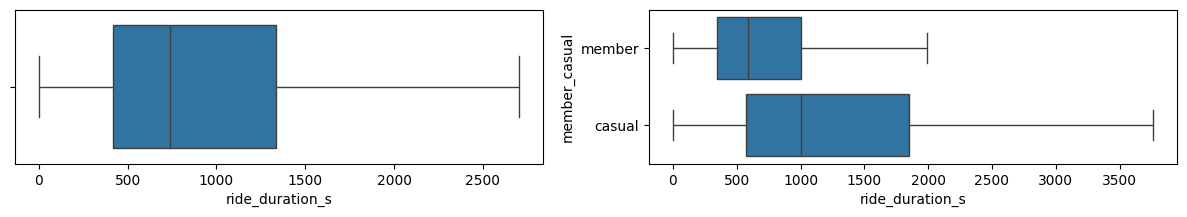

Percentile 25 is: 420.0 
Percentile 50 is: 737.0
Percentile 75 is: 1334.0
IQR is: 914.0
Mean is: 1323.7525551258393


In [13]:
fig,axes = plt.subplots(1,2,figsize=(15,2))
sns.boxplot(ax=axes[0], x = sampled_data['ride_duration_s'], showfliers = False)
sns.boxplot(ax=axes[1], y = sampled_data['member_casual'], x=sampled_data['ride_duration_s'], showfliers = False)
plt.show()

percentile25 = sampled_data['ride_duration_s'].quantile(0.25)
percentile50 = sampled_data['ride_duration_s'].quantile(0.5)
percentile75 = sampled_data['ride_duration_s'].quantile(0.75)

# Interquartile range
iqr = percentile75 - percentile25

print('Percentile 25 is: {} '.format(percentile25))
print('Percentile 50 is: {}'.format(percentile50))
print('Percentile 75 is: {}'.format(percentile75))
print('IQR is: {}'.format(iqr))
print('Mean is: {}'.format(sampled_data['ride_duration_s'].mean()))

Using z-score to standardize and eliminate outliers

In [14]:
# Apply z_score
sampled_data['z_score'] = stats.zscore(sampled_data['ride_duration_s'])

# Filter data outside the range
df_clean = sampled_data[(sampled_data['z_score'] < 3) & (sampled_data['z_score'] > -3)]

print(f'Number of outliers dropped: {sampled_data.shape[0] - df_clean.shape[0]}')

df_clean['ride_duration_s'].describe()

Number of outliers dropped: 923


count    948541.000000
mean       1158.221505
std        1529.904664
min           0.000000
25%         420.000000
50%         736.000000
75%        1331.000000
max       38132.000000
Name: ride_duration_s, dtype: float64

Sort by the start day and assign each day a distinct number.

In [16]:
# Filter our columns 
df = df_clean.loc[:,['member_casual','rideable_type','month','day','started_at','start_day','start_time',
                'ended_at','end_time','ride_duration_s','ride_id']]
# Sort by the start day
df_rides = df.groupby(['month','start_day','day']).count()[['ride_id']].reset_index()

df_rides['start_day'] = pd.to_datetime(df_rides['start_day'])
df_rides = df_rides.sort_values(by='start_day').reset_index(drop=True)

# Order month column
month_order = ['Nov-20','Dec-20','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21',
               'Aug-21','Sep-21','Oct-21','Nov-21']
df_rides.index = pd.CategoricalIndex(df_rides['month'], categories=month_order, ordered=True)
df_rides = df_rides.sort_index().reset_index(drop=True)
df_rides['time_period'] = df_rides.index

df_rides.head()

,month,start_day,day,ride_id,time_period
0,Nov-20,2020-11-01,Sunday,954,0
1,Nov-20,2020-11-02,Monday,1401,1
2,Nov-20,2020-11-03,Tuesday,2116,2
3,Nov-20,2020-11-04,Wednesday,2146,3
4,Nov-20,2020-11-05,Thursday,2063,4


## 5. Plot Ride Trend

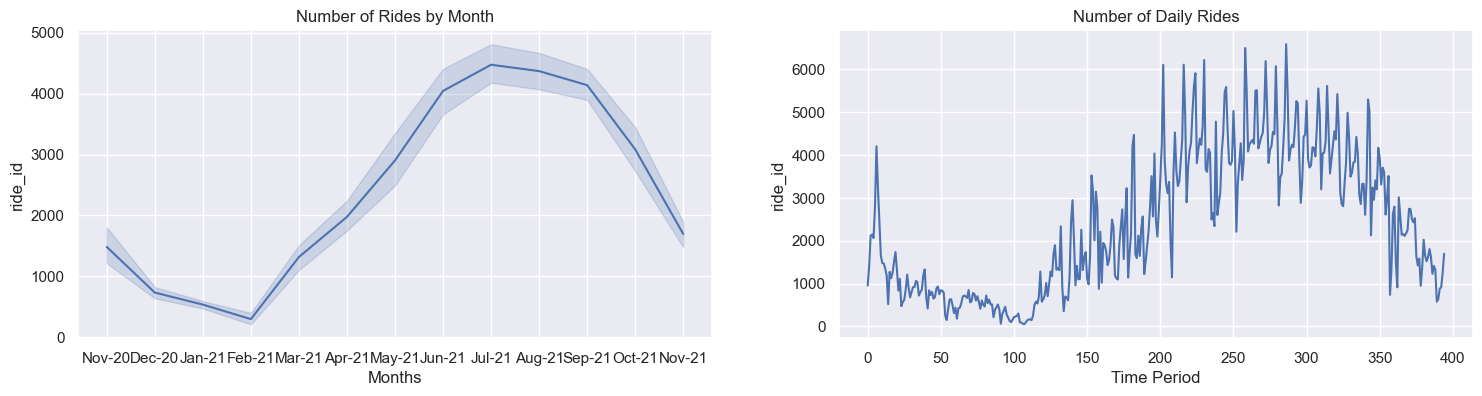

In [33]:
fig, axes = plt.subplots(1,2, figsize = (18,6))
sns.set(style='darkgrid')
sns.lineplot(ax = axes[0], data=df_rides, x= 'month', y = 'ride_id')
axes[0].set_title('Number of Rides by Month')
axes[0].set_xlabel('Months')
sns.lineplot(ax = axes[1], data=df_rides, x= 'time_period', y = 'ride_id')
axes[1].set_title('Number of Daily Rides')
axes[1].set_xlabel('Time Period')

plt.show()

Group the number of rides by each month.

In [18]:
# Create a column for most demanded months
df_month_rides = df_rides.groupby(['month']).agg({'ride_id':'sum'}).reset_index()

# Order month column
month_order = ['Nov-20','Dec-20','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21',
               'Aug-21','Sep-21','Oct-21','Nov-21']
df_month_rides.index = pd.CategoricalIndex(df_month_rides['month'], categories=month_order, ordered=True)
df_month_rides = df_month_rides.sort_index().reset_index(drop=True)
df_month_rides['time_period'] = df_month_rides.index

# Rearrange columns
df_month_rides = df_month_rides[['time_period','month','ride_id']]
df_month_rides.head()

,time_period,month,ride_id
0,0,Nov-20,44519
1,1,Dec-20,22780
2,2,Jan-21,16680
3,3,Feb-21,8391
4,4,Mar-21,40883
5,5,Apr-21,59307
6,6,May-21,89980
7,7,Jun-21,121292
8,8,Jul-21,138646
9,9,Aug-21,135407


Number of rides each day

In [19]:
df_daily_rides = df_rides[['time_period','start_day','ride_id']]
df_daily_rides.head()

,time_period,start_day,ride_id
0,0,2020-11-01,954
1,1,2020-11-02,1401
2,2,2020-11-03,2116
3,3,2020-11-04,2146
4,4,2020-11-05,2063
...,...,...,...
390,390,2021-11-26,636
391,391,2021-11-27,880
392,392,2021-11-28,914
393,393,2021-11-29,1259


## 6. Feature Engineering
- Create a 'high_demand' column that checks for the busy periods based on the mean.
- Set our target using using past number of rides


Create High Demand Column

In [20]:
# Month Table
df_month_rides['high_demand'] = (df_month_rides['ride_id'] > df_month_rides['ride_id'].mean()).astype(int)

print('Mean number of rides:', df_month_rides['ride_id'].mean())
print('Number of high demand months =', df_month_rides['high_demand'].value_counts()[1])
print('Number of low demand months =', df_month_rides['high_demand'].value_counts()[0])

Mean number of rides: 72964.69230769231
Number of high demand months = 6
Number of low demand months = 7


In [21]:
# Day Table
df_daily_rides['high_demand'] = (df_daily_rides['ride_id'] > df_daily_rides['ride_id'].mean()).astype(int)

print('Mean number of rides:', df_daily_rides['ride_id'].mean())
print('Number of high demand months =', df_daily_rides['high_demand'].value_counts()[1])
print('Number of low demand months =', df_daily_rides['high_demand'].value_counts()[0])

Mean number of rides: 2401.3696202531646
Number of high demand months = 184
Number of low demand months = 211


C:\Users\Razak\AppData\Local\Temp\ipykernel_18084\1219558887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_rides['high_demand'] = (df_daily_rides['ride_id'] > df_daily_rides['ride_id'].mean()).astype(int)


Using the past month and two month rides as our target. 

In [22]:
# MONTHLY 
# Set our target prediction
df_mp = df_month_rides
df_mp['Rides_LastMonth'] = df_mp['ride_id'].shift(+1)
df_mp['Rides_Last2Month'] = df_mp['ride_id'].shift(+2)

# Drop na rows
df_mp.dropna(inplace=True)

df_mp = df_mp.reset_index(drop=True)
df_mp.head()

Using the past week and two weeks rides as our target. 

In [24]:
# Set our target prediction
df_dp = df_daily_rides
df_dp['Rides_LastWeek'] = df_dp['ride_id'].shift(+7)
df_dp['Rides_Last2Week'] = df_dp['ride_id'].shift(+14)

# Drop na rows
df_dp.dropna(inplace=True)

df_dp = df_dp.reset_index(drop=True)
df_dp.head()

## 7. Multiple Linear Regression Model

In [26]:
# MONTH
lin_model_m = LinearRegression()

# Here we include the high demand days
x1_m, x2_m, x3_m, y_m = df_mp['Rides_LastMonth'], df_mp['Rides_Last2Month'], df_mp['high_demand'], df_mp['ride_id']
x1_m, x2_m, x3_m, y_m = np.array(x1_m), np.array(x2_m), np.array(x3_m), np.array(y_m)
x1_m, x2_m, x3_m, y_m = x1_m.reshape(-1,1), x2_m.reshape(-1,1), x3_m.reshape(-1,1), y_m.reshape(-1,1)
final_xm = np.concatenate((x1_m,x2_m,x3_m),axis=1)

# Split dataset into trainig and holdout datasets
X_train_m, X_test_m, y_train_m, y_test_m = final_xm[:], final_xm[:], y_m[:], y_m[:]

# Linear Regression
lin_model_m.fit(X_train_m,y_train_m)
lin_pred_m = lin_model_m.predict(X_test_m)

# DAYS
lin_model_d = LinearRegression()
# Here we include the high demand days
x1_d, x2_d, x3_d, y_d = df_dp['Rides_LastWeek'], df_dp['Rides_Last2Week'], df_dp['high_demand'], df_dp['ride_id']
x1_d, x2_d, x3_d, y_d = np.array(x1_d), np.array(x2_d), np.array(x3_d), np.array(y_d)
x1_d, x2_d, x3_d, y_d = x1_d.reshape(-1,1), x2_d.reshape(-1,1), x3_d.reshape(-1,1), y_d.reshape(-1,1)
final_xd = np.concatenate((x1_d,x2_d,x3_d),axis=1)

# Split dataset into trainig and holdout datasets
X_train_d, X_test_d, y_train_d, y_test_d = final_xd[:], final_xd[:], y_d[:], y_d[:]

# Linear Regression
lin_model_d.fit(X_train_d,y_train_d)
lin_pred_d = lin_model_d.predict(X_test_d)

Plot Model

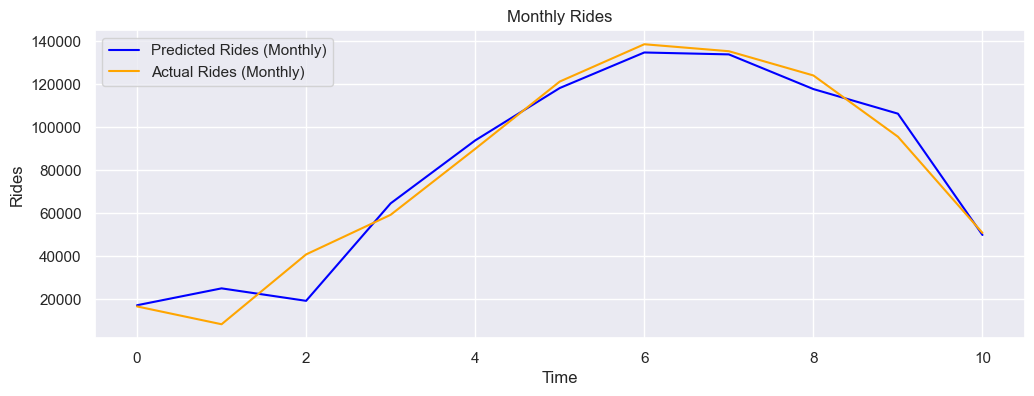

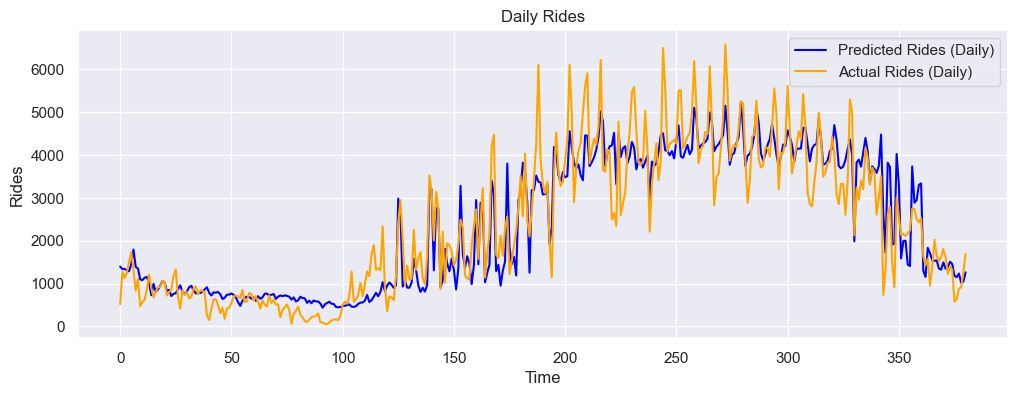

In [27]:
# Plot for Monthly Rides
plt.figure(figsize=(12, 4))
plt.plot(lin_pred_m, label='Predicted Rides (Monthly)', color='blue')
plt.plot(y_test_m, label='Actual Rides (Monthly)', color='orange')
plt.xlabel('Time')
plt.ylabel('Rides')
plt.title('Monthly Rides')
plt.legend()
plt.show()

# Plot for Daily Rides
plt.figure(figsize=(12, 4))
plt.plot(lin_pred_d, label='Predicted Rides (Daily)', color='blue')
plt.plot(y_test_d, label='Actual Rides (Daily)', color='orange')
plt.xlabel('Time')
plt.ylabel('Rides')
plt.title('Daily Rides')
plt.legend()
plt.show()

### Model Evaluation

In [28]:
mse_m = mean_squared_error(y_test_m, lin_pred_m)
mae_m = mean_absolute_error(y_test_m, lin_pred_m)
r2_m = r2_score(y_test_m, lin_pred_m)

print('Mean Squared Error (Month):',mse_m)
print('Mean Absolute Error (Month):',mae_m)
print('R-squared (Month):', r2_m)
print()

mse_d = mean_squared_error(y_test_d, lin_pred_d)
mae_d = mean_absolute_error(y_test_d, lin_pred_d)
r2_d = r2_score(y_test_d, lin_pred_d)

print('Mean Squared Error (Days):',mse_d)
print('Mean Absolute Error (Days):',mae_d)
print('R-squared (Days):', r2_d)

Mean Squared Error (Month): 88271758.88182889
Mean Absolute Error (Month): 6768.066522744165
R-squared (Month): 0.9567440708161947

Mean Squared Error (Days): 383526.85802276724
Mean Absolute Error (Days): 460.167187155566
R-squared (Days): 0.8623635298919636


Both models are great, but the daily regression model has a significantly better 'Mean Absolute Error' so we can accept that as our preferred model.

## 8. Checking Model Assumptions

##### Normality and Homoscedasticity

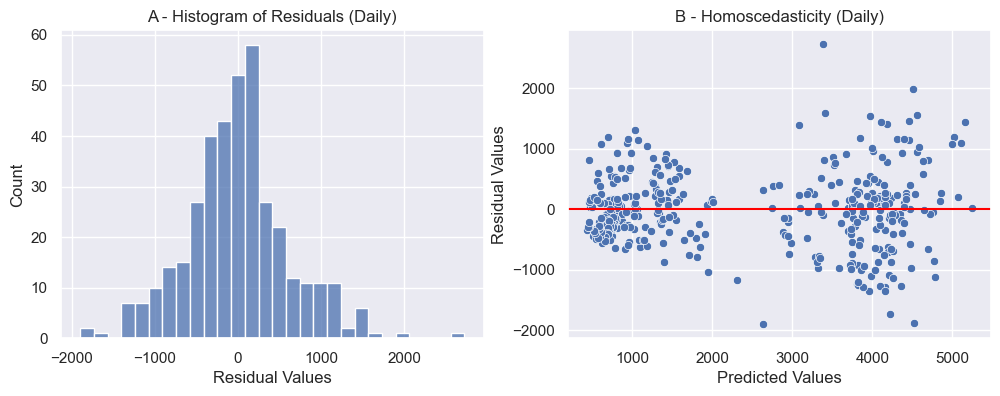

In [29]:
actual_d = pd.DataFrame(y_test_d, columns=['actual'])
predicted_d = pd.DataFrame(lin_pred_d, columns=['predicted'])

results_d = [actual_d, predicted_d]
results_dd = pd.concat(results_d, axis=1)
results_dd['residual'] = results_dd['actual']-results_dd['predicted']

# Plot Check Normal Distribution Graph
fig,axes = plt.subplots(1,2,figsize=(12,4))
sns.histplot(results_dd['residual'], ax=axes[0])
axes[0].set_title('A - Histogram of Residuals (Daily)')
axes[0].set_xlabel('Residual Values')

# Plot Check Homoscedasticity
sns.scatterplot(x='predicted',y='residual', data =results_dd, ax=axes[1])
axes[1].axhline(0, color = 'red')
axes[1].set_title('B - Homoscedasticity (Daily)')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residual Values')

plt.show()

- A: Here we check if our residuals are normally distributed. From the bell shaped plot, we can conclude that normality assumption has been met.
- B: In this plot, the residuals appear as a random cloud of points, which confirms the variation of residuals is consistent or similar across the model and satisfies the assumption of Homoscedasticity.

Viz model results

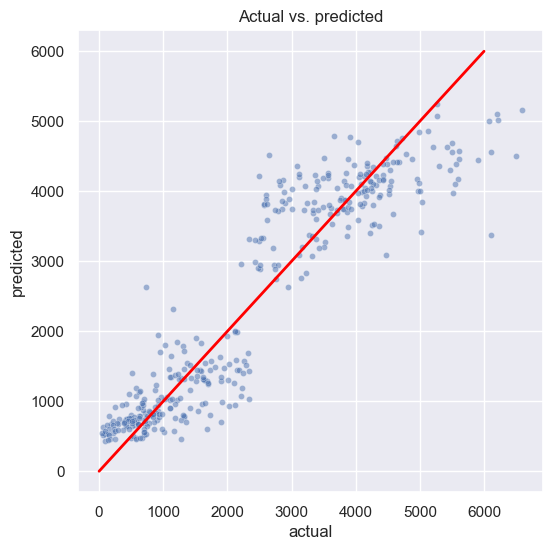

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results_dd,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,6000], [0,6000], c='red', linewidth=2)
plt.title('Actual vs. predicted');

## 9. Model Results

In [31]:
print('Coefficients:', lin_model_d.coef_)
print('Intercepts:', lin_model_d.intercept_)

Coefficients: [[2.28623833e-01 2.67627596e-01 1.70894808e+03]]
Intercepts: [398.39902902]
